<a href="https://colab.research.google.com/github/SuryanshNaugraiya/Bitcoin_Prediction_System/blob/master/ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Part-1 -Data Collection

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving bitcoin_usd.csv to bitcoin_usd.csv
User uploaded file "bitcoin_usd.csv" with length 101440 bytes


In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("bitcoin_usd.csv")

In [5]:
df.head()

,_id,time,high,low,open,close
0,5f5c943ba9115d187c3c8ad4,1470268800,584.89,559.50,566.44,576.22
1,5f5c943ba9115d187c3c8ad5,1470355200,579.97,565.81,576.22,574.66
2,5f5c943ba9115d187c3c8ad6,1470441600,596.68,565.33,574.66,586.45
3,5f5c943ba9115d187c3c8ad7,1470528000,596.01,580.87,586.45,590.85
4,5f5c943ba9115d187c3c8ad8,1470614400,594.24,585.41,590.85,589.24


In [6]:
df=df.drop(labels=['_id','time'],axis=1)

In [7]:
df.head()

,high,low,open,close
0,584.89,559.50,566.44,576.22
1,579.97,565.81,576.22,574.66
2,596.68,565.33,574.66,586.45
3,596.01,580.87,586.45,590.85
4,594.24,585.41,590.85,589.24


In [8]:
df.tail()

,high,low,open,close
1496,10443.72,9855.68,10379.08,10128.54
1497,10349.09,9989.63,10128.54,10228.85
1498,10493.32,10221.37,10228.85,10345.68
1499,10412.60,10215.49,10345.68,10398.50
1500,10412.41,10323.17,10398.50,10349.80


In [9]:
df.columns

Index(['high', 'low', 'open', 'close'], dtype='object')

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


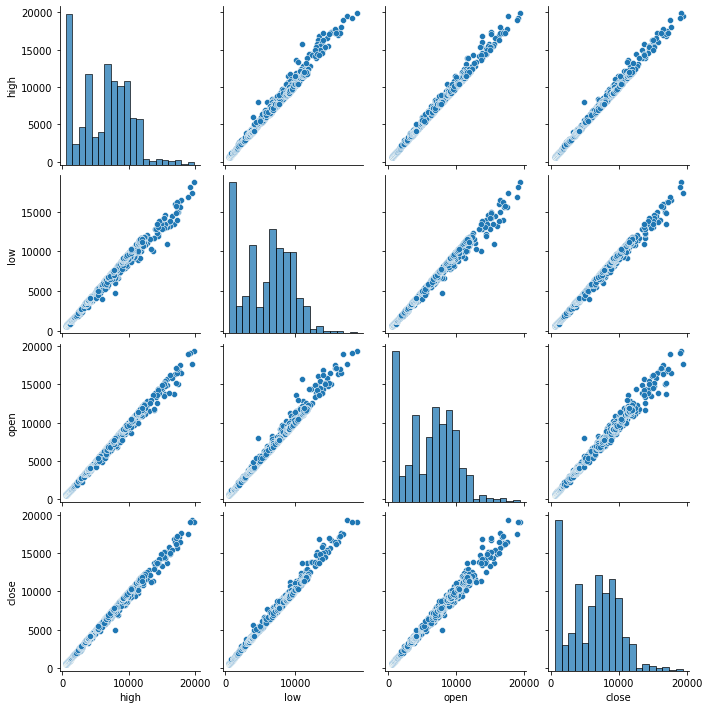

In [11]:
sns.pairplot(df)

In [12]:
df.corr()

,high,low,open,close
high,1.000000,0.995285,0.997839,0.998047
low,0.995285,1.000000,0.996269,0.997598
open,0.997839,0.996269,1.000000,0.995761
close,0.998047,0.997598,0.995761,1.000000


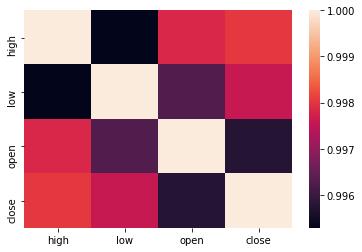

In [13]:
sns.heatmap(df.corr())

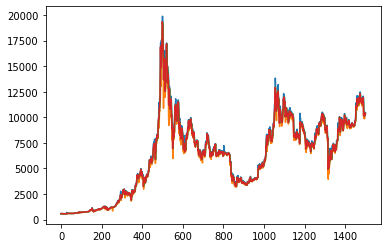

In [14]:
import matplotlib.pyplot as plt
plt.plot(df)

In [16]:
X =df.loc[:,['close', 'low', 'open']]
Y = df.loc[:,'high']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# **Multivariate Linear Regression**

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model1 = LinearRegression()
model1.fit(X_train,y_train)
print("Train Accuracy: ", model1.score(X_train,y_train))
print("Test Accuracy: ", model1.score(X_test,y_test))

Train Accuracy:  0.9988629751105303
Test Accuracy:  0.9986473052567008


# **Theil-Sen Regression**

In [21]:
from sklearn.linear_model import TheilSenRegressor

In [22]:
model2 = TheilSenRegressor()
model2.fit(X_train,y_train)
print("Train Accuracy: ", model2.score(X_train,y_train))
print("Test Accuracy: ", model2.score(X_test,y_test))

Train Accuracy:  0.9987375346371885
Test Accuracy:  0.9985225135261351


# **Huber Regression**

In [23]:
from sklearn.linear_model import HuberRegressor

In [24]:
model3 = HuberRegressor()
model3.fit(X_train,y_train)
print("Train Accuracy: ", model3.score(X_train,y_train))
print("Test Accuracy: ", model3.score(X_test,y_test))

Train Accuracy:  0.9987968424041718
Test Accuracy:  0.9986683660265494


# **Diagram and Table**

In [26]:
df_model=pd.DataFrame({'Model_Applied':['Linear_Regression','TheilSen_Regression','Huber_Regression'],'Accuracy':[model1.score(X_test,y_test),model2.score(X_test,y_test),model3.score(X_test,y_test)]})

In [27]:
df_model

,Model_Applied,Accuracy
0,Linear_Regression,0.998647
1,TheilSen_Regression,0.998523
2,Huber_Regression,0.998668


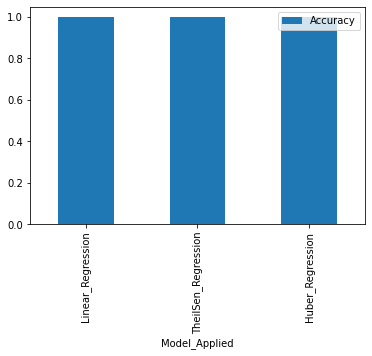

In [28]:
df_model.plot(kind='bar',x='Model_Applied')